In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr , spearmanr

# Set values to be used in machine learning model

In [2]:
kentucky = pd.read_csv('kentucky.csv')

kentucky = kentucky.rename(columns={'year' : 'Year',
                                                  'county' : 'County',
                                                  'state' : 'State',
                                                  'povrate' : 'Poverty Rate',
                                                  'wagesal_percap' : 'Wages and Salary per Capita',
                                                  'trans_gov_pc' : 'Government Transfers per Capita',
                                                  'trans_medicare_pc' : 'Medicare Transfers per Capita',
                                                  'oldfrac' : 'Share of Population 65+',
                                                  'totalpop' : 'Total Population',
                                                  'trans_medicaid_pc' : 'Medicaid Transfers per Capita',
                                                  'unemprate' : 'Unemployment Rate'})

In [3]:
kentucky.head(15)

,Year,County,State,Poverty Rate,Wages and Salary per Capita,Government Transfers per Capita,Medicare Transfers per Capita,Share of Population 65+,Total Population,Medicaid Transfers per Capita,Unemployment Rate
0,2015,"Jefferson County, KY",21,15.4,33.507957,9.084407,2.130403,0.149360,764946,2.096687,4.8
1,2010,"Bullitt County, KY",21,10.5,8.515895,7.242966,1.688295,0.112443,74500,0.711899,10.6
2,2003,"Henry County, KY",21,12.7,8.604240,5.768100,1.374146,0.124844,15259,0.952066,5.3
3,2005,"Oldham County, KY",21,5.0,10.085989,3.747598,0.786488,0.075646,54266,0.595427,4.8
4,2009,"Oldham County, KY",21,5.9,9.899155,5.031501,1.107172,0.088880,59777,0.634520,8.3
5,2014,"Jefferson County, KY",21,16.8,31.422703,8.674019,2.055432,0.145697,761725,1.854879,6.0
6,2006,"Henry County, KY",21,15.4,8.485260,6.488068,1.759632,0.131373,15475,1.020675,5.7
7,2007,"Shelby County, KY",21,13.3,15.036273,5.282291,1.366415,0.114020,40335,0.643202,4.7
8,2002,"Bullitt County, KY",21,NaN,6.740033,4.353430,0.754777,0.081396,63775,0.683760,5.2
9,2019,"Jefferson County, KY",21,14.2,35.990448,9.287062,2.294696,0.166599,766757,1.991303,4.0


In [4]:
kentucky.shape

(2160, 11)

# Clean Data and set datetime and fill void values

In [5]:
kentucky.drop(kentucky[kentucky['Year'] == '2002'].index, inplace=True)

In [6]:
kentucky['Date'] = pd.to_datetime(kentucky['Year'], format='%Y')

kentucky.drop('Year', inplace=True, axis=1)

kentucky = kentucky.fillna(kentucky['Poverty Rate'].mean())

# Create Poverty Rate Average from 2003 - 2019

In [7]:
kentucky_mean_pov = kentucky['Poverty Rate'].mean()
kentucky['Above Average Poverty Mean'] = (kentucky['Poverty Rate'] - kentucky_mean_pov) > 0

In [8]:
kentucky.sample(15)

,County,State,Poverty Rate,Wages and Salary per Capita,Government Transfers per Capita,Medicare Transfers per Capita,Share of Population 65+,Total Population,Medicaid Transfers per Capita,Unemployment Rate,Date,Above Average Poverty Mean
1409,"Letcher County, KY",21,30.100000,7.767114,13.955002,2.900159,0.164833,23357,4.363531,12.3,2014-01-01,True
1454,"Crittenden County, KY",21,20.600000,6.888243,10.193828,2.809973,0.184236,9249,1.564209,8.5,2011-01-01,True
1302,"Elliott County, KY",21,29.800000,4.245098,8.528871,1.752639,0.135257,7556,1.944484,8.3,2008-01-01,True
637,"Fulton County, KY",21,29.200000,13.812118,11.786002,2.960672,0.190327,6389,2.185097,10.8,2013-01-01,True
1425,"Caldwell County, KY",21,16.400000,11.333593,8.085786,1.981553,0.172987,12816,1.407247,5.9,2005-01-01,False
301,"Robertson County, KY",21,22.000000,4.521617,10.924698,2.250483,0.219639,2108,3.831613,5.4,2019-01-01,True
91,"Shelby County, KY",21,12.400000,13.156461,6.702741,1.701329,0.119396,41576,0.722336,9.4,2009-01-01,False
2088,"Nelson County, KY",21,15.500000,12.330147,7.639535,1.799627,0.119786,44062,0.957538,10.6,2011-01-01,False
1438,"Henderson County, KY",21,12.700000,18.811565,7.370888,1.921793,0.136686,45696,1.217319,5.0,2007-01-01,False
620,"Fulton County, KY",21,27.100000,13.823879,11.720339,2.835114,0.179521,6807,2.042370,11.5,2010-01-01,True


# Vizulazations for Poverty Rate in relation to values

<AxesSubplot:xlabel='Unemployment Rate', ylabel='Poverty Rate'>

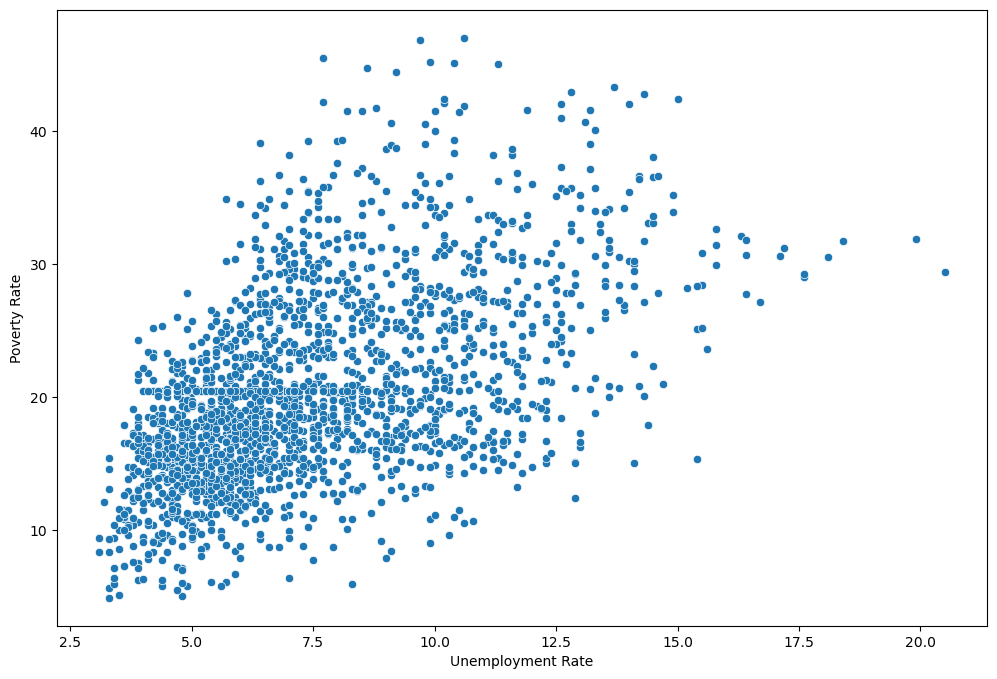

In [11]:
plt.figure(figsize=(12,8))

sns.scatterplot(x= 'Unemployment Rate',
                y= 'Poverty Rate',
                data= kentucky)

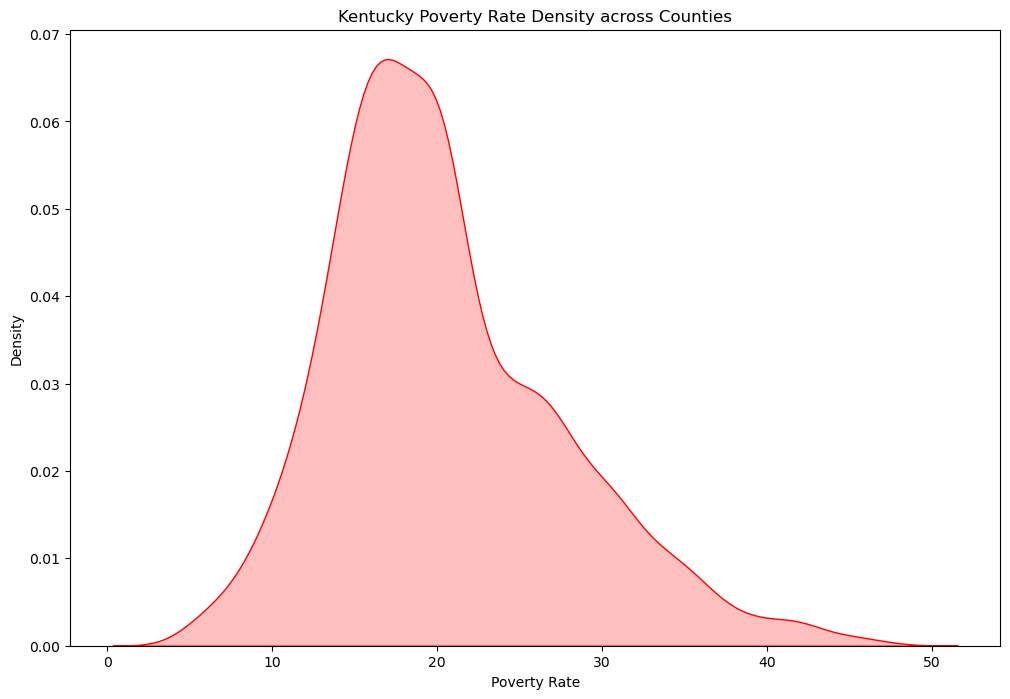

In [ ]:
plt.figure(figsize=(12,8))

sns.kdeplot(x= 'Poverty Rate',
            data= kentucky,
             shade=True,
             color='red')

plt.title('Kentucky Poverty Rate Density across Counties')

plt.show()

# Create readable values for machine learning model

In [ ]:
pov_map = {True : 1, False : 0}

kentucky['Above Average Poverty Mean'] = kentucky['Above Average Poverty Mean'].map(pov_map)

In [ ]:
num_true_kentucky = len(kentucky.loc[kentucky['Above Average Poverty Mean'] == 1])
num_false_kentucky = len(kentucky.loc[kentucky['Above Average Poverty Mean'] == 0])

print("Number of True cases for Kentucky: {0} ({1:2.2f}%)".format(num_true_kentucky, (num_true_kentucky/ (num_true_kentucky + num_false_kentucky)) * 100))
print("Number of False cases for Kentucky: {0} ({1:2.2f}%)".format(num_false_kentucky, (num_false_kentucky/ (num_true_kentucky + num_false_kentucky)) * 100))

Number of True cases for Kentucky: 839 (38.84%)
Number of False cases for Kentucky: 1321 (61.16%)


# Split the data for learning model and testing model

In [ ]:
from sklearn.model_selection import train_test_split

feature_col_names = ['Wages and Salary per Capita', 'Government Transfers per Capita', 'Medicare Transfers per Capita', 'Share of Population 65+', 'Total Population', 'Medicaid Transfers per Capita', 'Unemployment Rate']
predicted_class_name = ['Above Average Poverty Mean']

X = kentucky[feature_col_names].values
y = kentucky[predicted_class_name].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42) 

In [ ]:
print("{0:0.2f}% in training set".format((len(X_train)/len(kentucky.index)) * 100))
print("{0:0.2f}% in test set".format((len(X_test)/len(kentucky.index)) * 100))

70.00% in training set
30.00% in test set


In [ ]:
print("Original True  : {0} ({1:0.2f}%)".format(len(kentucky.loc[kentucky['Above Average Poverty Mean'] == 1]), (len(kentucky.loc[kentucky['Above Average Poverty Mean'] == 1])/len(kentucky.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(kentucky.loc[kentucky['Above Average Poverty Mean'] == 0]), (len(kentucky.loc[kentucky['Above Average Poverty Mean'] == 0])/len(kentucky.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 839 (38.84%)
Original False : 1321 (61.16%)

Training True  : 595 (39.35%)
Training False : 917 (60.65%)

Test True      : 244 (37.65%)
Test False     : 404 (62.35%)


# Naive Bayes Model application

In [ ]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

In [ ]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy: 0.6442


In [ ]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.6420


In [ ]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[191 213]
 [ 19 225]]

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.47      0.62       404
           1       0.51      0.92      0.66       244

    accuracy                           0.64       648
   macro avg       0.71      0.70      0.64       648
weighted avg       0.76      0.64      0.64       648

